In [16]:
#We will be using anomoly detection for this

https://www.coursera.org/learn/unsupervised-learning-recommenders-reinforcement-learning/programming/Rqh9M/anomaly-detection/lab?path=%2Fnotebooks%2FC3_W1_Anomaly_Detection.ipynb

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df=pd.read_csv('train.csv')

In [22]:
df.head(5)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [23]:
df.shape

(136429, 14)

##  <center> creating TEST and CV datasets </center>

In [3]:
df['Machine failure'].value_counts()

NameError: name 'df' is not defined

In [26]:
new_df = df[df['Machine failure'] ==0 ]                  

In [28]:
new_df['Machine failure'].value_counts()

0    134281
Name: Machine failure, dtype: int64

In [29]:
# new_df.to_csv('only_train.csv', index=False)

In [30]:
new_dfcv = df[df['Machine failure'] ==1 ]   

In [31]:
new_dfcv['Machine failure'].value_counts()

1    2148
Name: Machine failure, dtype: int64

In [32]:
# new_dfcv.to_csv('only_cv.csv', index=False)

In [33]:
df=pd.read_csv('only_train.csv')

In [34]:
df.head(5)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


# <center> PLOTTING DATA "train.csv" <center>

Values in train data have working and non working engine

In [6]:
df=pd.read_csv('train.csv')

In [7]:
df['Machine failure'].value_counts()

0    134281
1      2148
Name: Machine failure, dtype: int64

### AIR Temperature

Text(0.5, 0, 'Data')

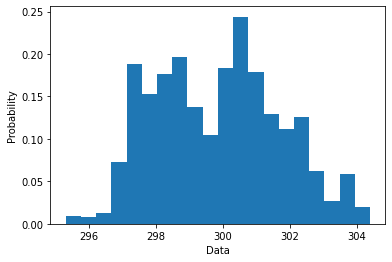

In [40]:
plt.hist(df['Air temperature [K]'],density=True, bins=20)
plt.ylabel('Probability')
plt.xlabel('Data')

In [9]:
max(df['Air temperature [K]'])   #max temperature

304.4

In [10]:
min(df['Air temperature [K]']) #min temperature

295.3

### Process temperature [K]

Text(0.5, 0, 'Data')

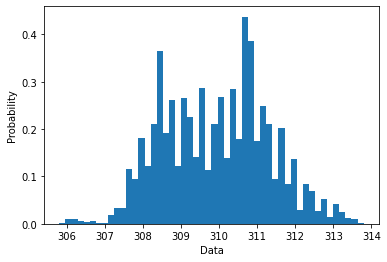

In [11]:
plt.hist(df['Process temperature [K]'],density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('Data')

In [12]:
max(df['Process temperature [K]'])

313.8

In [13]:
min(df['Process temperature [K]']) 

305.8

### Rotational speed [rpm]

Text(0.5, 0, 'Data')

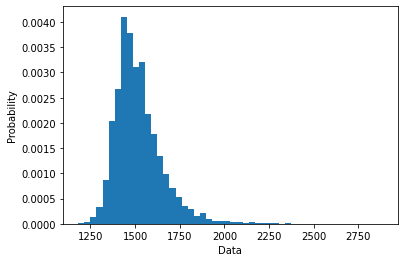

In [14]:
plt.hist(df['Rotational speed [rpm]'],density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('Data')

In [15]:
max(df['Rotational speed [rpm]'])

2886

In [16]:
min(df['Rotational speed [rpm]'])

1181

### Torque [Nm]

Text(0.5, 0, 'Data')

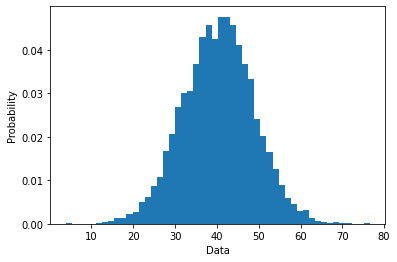

In [17]:
plt.hist(df['Torque [Nm]'],density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('Data')

In [18]:
max(df['Torque [Nm]'])

76.6

In [19]:
min(df['Torque [Nm]'])

3.8

### Tool wear [min]

Text(0.5, 0, 'Data')

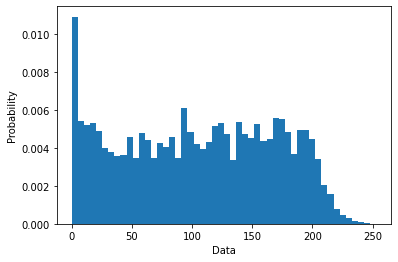

In [20]:
plt.hist(df['Tool wear [min]'],density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('Data')

In [21]:
min(df['Tool wear [min]'])

0

In [22]:
max(df['Tool wear [min]'])

253

### Other Data

In [23]:
df['TWF'].value_counts()

0    136217
1       212
Name: TWF, dtype: int64

In [24]:
df['HDF'].value_counts()

0    135725
1       704
Name: HDF, dtype: int64

In [25]:
df['PWF'].value_counts()

0    136102
1       327
Name: PWF, dtype: int64

In [26]:
df['OSF'].value_counts()

0    135889
1       540
Name: OSF, dtype: int64

In [27]:
df['RNF'].value_counts()

0    136121
1       308
Name: RNF, dtype: int64

### Scatter Plots -> Taking Air temperature [K] as bet


Text(0, 0.5, 'Process temperature [K]')

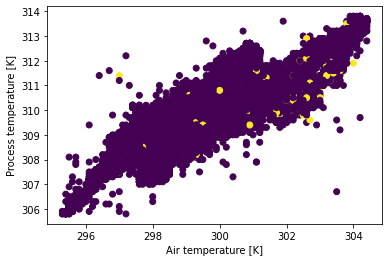

In [36]:
#Dosen't work -> Air temperature [K] and Process temperature [K]
plt.scatter(df['Air temperature [K]'],df['Process temperature [K]'],c=df['Machine failure'])
plt.xlabel('Air temperature [K]')
plt.ylabel('Process temperature [K]')

Text(0, 0.5, 'Rotational speed [rpm]')

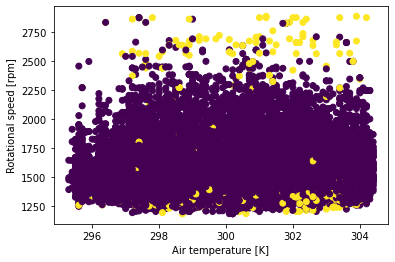

In [35]:
#Works  -> Rotational speed [rpm]
plt.scatter(df['Air temperature [K]'],df['Rotational speed [rpm]'],c=df['Machine failure'])
plt.xlabel('Air temperature [K]')
plt.ylabel('Rotational speed [rpm]')

Text(0, 0.5, 'Torque [Nm]')

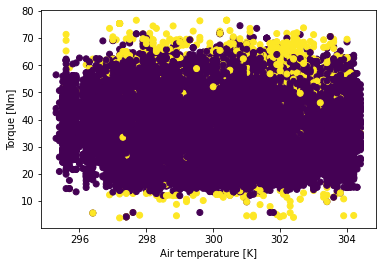

In [42]:
#Works -> Torque [Nm]
plt.scatter(df['Air temperature [K]'],df['Torque [Nm]'],c=df['Machine failure'])
plt.xlabel('Air temperature [K]')
plt.ylabel('Torque [Nm]')

Text(0, 0.5, 'Tool wear [min]')

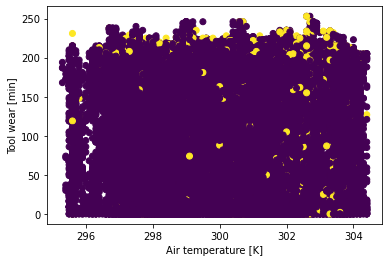

In [43]:
# Somewhat works -> Tool wear [min]
plt.scatter(df['Air temperature [K]'],df['Tool wear [min]'],c=df['Machine failure'])
plt.xlabel('Air temperature [K]')
plt.ylabel('Tool wear [min]')

In [45]:
df['Type'].value_counts()

L    95354
M    32152
H     8923
Name: Type, dtype: int64

In [46]:
df['Type'] = df['Type'].replace({'L': 2, 'M': 1,'H':0})

In [47]:
df['Type'].value_counts()

2    95354
1    32152
0     8923
Name: Type, dtype: int64

Text(0, 0.5, 'Type')

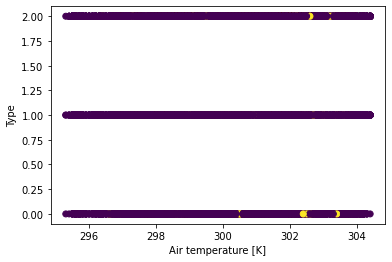

In [49]:
#Dosent work->Type
plt.scatter(df['Air temperature [K]'],df['Type'],c=df['Machine failure'])
plt.xlabel('Air temperature [K]')
plt.ylabel('Type')

Text(0, 0.5, 'TWF')

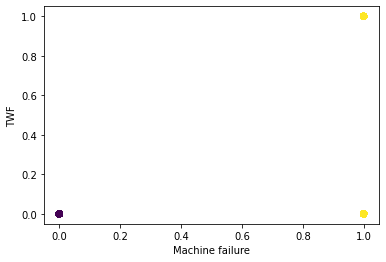

In [51]:
plt.scatter(df['Machine failure'],df['TWF'],c=df['Machine failure'])
plt.xlabel('Machine failure')
plt.ylabel('TWF')